# Notebook do Trabalho Definição de Dataset Limpeza e Análise dos Dados

ALUNO: Emerson Adam
CDA - UTFPR

# Definição do Dataset

Dataset utilizado foi o SiGesGuarda, do site de dados abertos da prefeitura de Curitiba. O dataset contém os dados das ocorrências atendidas pela Guarda Municipal de Curitiba entre 2009 e 2023. https://mid.curitiba.pr.gov.br/dadosabertos/Sigesguarda/2023-04-01_sigesguarda_-_Base_de_Dados.csv

# Algumas perguntas sobre o dataset
<li>Quais são os tipos de registros mais comuns em Curitiba?
<li>Quais os dias da semana possuem mais registros?
<li>Quais bairros possuem mais registros?
<li>Qual a distribuição das ocorrências nos anos?
<li>Qual o dia onde há o maior numero de registros referente à perturbação de sossego?
<li>Qual o período do dia em que há maior registros referente à perturbação de sossego?

In [140]:
import pandas as pd
#importando dataset em um dataframe utilizando Pandas
df = pd.read_csv('../trabalho/data/2023-04-01_sigesguarda_-_Base_de_Dados.csv', sep=';', encoding='ANSI',low_memory=False)

In [141]:
#olhando os primeiros 10 registros do dataframe
df.head(100)

,ATENDIMENTO_ANO,ATENDIMENTO_BAIRRO_NOME,EQUIPAMENTO_URBANO_NOME,FLAG_EQUIPAMENTO_URBANO,FLAG_FLAGRANTE,LOGRADOURO_NOME,NATUREZA1_DEFESA_CIVIL,NATUREZA1_DESCRICAO,NATUREZA2_DEFESA_CIVIL,NATUREZA2_DESCRICAO,...,OCORRENCIA_HORA,OCORRENCIA_MES,OPERACAO_DESCRICAO,ORIGEM_CHAMADO_DESCRICAO,REGIONAL_FATO_NOME,SECRETARIA_NOME,SECRETARIA_SIGLA,SERVICO_NOME,SITUACAO_EQUIPE_DESCRICAO,NUMERO_PROTOCOLO_156
0,---------------,-----------------------,----------------------------------------------...,-----------------------,--------------,----------------------------------------------...,----------------------,----------------------------------------------...,----------------------,----------------------------------------------...,...,---------------,--------------,----------------------------------------------...,----------------------------------------------...,--------------------,----------------------------------------------...,----------------,----------------------------------------------...,----------------------------------------------...,--------------------
1,2009,CIDADE INDUSTRIAL,NaN,NÃO,NÃO,DAVI XAVIER DA SILVA,0,Alarmes,NaN,NaN,...,15:14:00,1,NaN,.,CIC,FUNDAÇÃO DE AÇÃO SOCIAL,FAS,SIGA,NaN,NaN
2,2009,FAZENDINHA,BOSQUE DA FAZENDINHA,SIM,NÃO,CARLOS KLEMTZ,0,Roubo,NaN,NaN,...,15:22:00,1,NaN,153,PORTÃO,SECRETARIA MUNICIPAL MEIO AMBIENTE,SMMA,NORMAL,NaN,NaN
3,2009,UBERABA,NaN,NÃO,NÃO,DOUTOR JOÃO DE PAULA MOURA BRITO,0,Animais,NaN,NaN,...,15:59:00,1,NaN,156,CAJURU,SECRETARIA MUNICIPAL DA SAÚDE,SMS,SACAF,NaN,2640856
4,2009,SÍTIO CERCADO,NaN,NÃO,NÃO,EDGARD CAVALCANTI DE ALBUQUERQUE,0,Animais,NaN,NaN,...,16:13:00,1,NaN,156,BAIRRO NOVO,SECRETARIA MUNICIPAL DA SAÚDE,SMS,SACAF,NaN,2640854
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2009,BOA VISTA,NaN,NÃO,NÃO,BRIGADEIRO ARTHUR CARLOS PERALTA,1,Alagamento,NaN,NaN,...,16:51:00,1,NaN,156,BOA VISTA,SECRETARIA MUNICIPAL DE DEFESA SOCIAL E TRANSITO,SMDT,NORMAL,NaN,NaN
96,2009,REBOUÇAS,NaN,NÃO,NÃO,MARECHAL FLORIANO PEIXOTO,1,Alagamento,NaN,NaN,...,16:51:00,1,NaN,156,MATRIZ,SECRETARIA MUNICIPAL DE DEFESA SOCIAL E TRANSITO,SMDT,NORMAL,NaN,NaN
97,2009,FAZENDINHA,NaN,NÃO,NÃO,PINHEIRO MACHADO,1,Alagamento,NaN,NaN,...,16:51:00,1,NaN,156,PORTÃO,SECRETARIA MUNICIPAL DE DEFESA SOCIAL E TRANSITO,SMDT,NORMAL,NaN,NaN
98,2009,TATUQUARA,NaN,NÃO,NÃO,ELIAS CASSEB,1,Alagamento,NaN,NaN,...,17:50:00,1,NaN,199,PINHEIRINHO,SECRETARIA MUNICIPAL DE DEFESA SOCIAL E TRANSITO,SMDT,NORMAL,NaN,NaN


In [143]:
#Olhando alguns dados estatisticos sobre o dataframe criado
df.describe()

,ATENDIMENTO_ANO,ATENDIMENTO_BAIRRO_NOME,EQUIPAMENTO_URBANO_NOME,FLAG_EQUIPAMENTO_URBANO,FLAG_FLAGRANTE,LOGRADOURO_NOME,NATUREZA1_DEFESA_CIVIL,NATUREZA1_DESCRICAO,NATUREZA2_DEFESA_CIVIL,NATUREZA2_DESCRICAO,...,OCORRENCIA_HORA,OCORRENCIA_MES,OPERACAO_DESCRICAO,ORIGEM_CHAMADO_DESCRICAO,REGIONAL_FATO_NOME,SECRETARIA_NOME,SECRETARIA_SIGLA,SERVICO_NOME,SITUACAO_EQUIPE_DESCRICAO,NUMERO_PROTOCOLO_156
count,429328,429202,152087,429347,429347,429347,429347,429347,22175,22175,...,429347,429347,317124,429347,429336,429347,429347,429347,303670,12346
unique,15,193,3786,3,3,19120,3,189,3,167,...,1441,13,22,33,15,39,39,32,4,12345
top,2021,CENTRO,PARQUE BARIGUI,NÃO,NÃO,MARECHAL FLORIANO PEIXOTO,0,Apoio,0,Apoio,...,15:00:00,3,NORMAL,153,MATRIZ,SECRETARIA MUNICIPAL DE DEFESA SOCIAL E TRANSITO,SMDT,NORMAL,Solicitação,2758909
freq,58726,73559,4362,277260,410150,7723,417971,69920,21731,3206,...,2984,38840,300393,149571,134535,283173,283173,323524,219161,2


In [144]:
#olhando a quantidade de Linhas
df.shape[0]

429347

In [145]:
#verificando todos as colunas existentes no DF
df.columns

Index(['ATENDIMENTO_ANO', 'ATENDIMENTO_BAIRRO_NOME', 'EQUIPAMENTO_URBANO_NOME',
       'FLAG_EQUIPAMENTO_URBANO', 'FLAG_FLAGRANTE', 'LOGRADOURO_NOME',
       'NATUREZA1_DEFESA_CIVIL', 'NATUREZA1_DESCRICAO',
       'NATUREZA2_DEFESA_CIVIL', 'NATUREZA2_DESCRICAO',
       'NATUREZA3_DEFESA_CIVIL', 'NATUREZA3_DESCRICAO',
       'NATUREZA4_DEFESA_CIVIL', 'NATUREZA4_DESCRICAO',
       'NATUREZA5_DEFESA_CIVIL', 'NATUREZA5_DESCRICAO',
       'SUBCATEGORIA1_DESCRICAO', 'SUBCATEGORIA2_DESCRICAO',
       'SUBCATEGORIA3_DESCRICAO', 'SUBCATEGORIA4_DESCRICAO',
       'SUBCATEGORIA5_DESCRICAO', 'OCORRENCIA_ANO', 'OCORRENCIA_CODIGO',
       'OCORRENCIA_DATA', 'OCORRENCIA_DIA_SEMANA', 'OCORRENCIA_HORA',
       'OCORRENCIA_MES', 'OPERACAO_DESCRICAO', 'ORIGEM_CHAMADO_DESCRICAO',
       'REGIONAL_FATO_NOME', 'SECRETARIA_NOME', 'SECRETARIA_SIGLA',
       'SERVICO_NOME', 'SITUACAO_EQUIPE_DESCRICAO', 'NUMERO_PROTOCOLO_156'],
      dtype='object')

In [81]:
#olhando os tipos de atendimentos efetuados no período
df['NATUREZA1_DESCRICAO'].unique()

array(['----------------------------------------------------------------------------------------------------',
       'Alarmes', 'Roubo', 'Animais', 'Trânsito', 'Invasão', 'Apoio',
       'Fundada Suspeita (Abordagem)', 'Substância Ilícita',
       'Atitude Suspeita', 'Queda de árvore', 'Alagamento', 'Dano',
       'Veículo', 'Desinteligência', 'Rixa', 'Averiguação',
       'Uso indevido do cartão transporte', 'Orientação', 'Furto',
       'Desabamento', 'Risco de acidente/à vida (Defesa Civil)',
       'Bueiro entupido', 'Perturbação do sossego', 'Erosão', 'Ameaça',
       'Risco de desabamento / desmoronamento', 'Agressão física/verbal',
       'Pesca em local proibido', 'Desacato', 'Vias de fato',
       'Porte Ilegal', 'Risco de acidente / à vida', 'Depósito irregular',
       'Ataque de insetos', 'Proteção ao patrimônio', 'Destelhamento',
       'Extorsão', 'Queima a céu aberto',
       'Escrito ou objeto obsceno (panfletos pornográficos)',
       'Disparo de arma', 'Achado', 'Sub

In [146]:
#identificado quais colunas iremos trabalhar iremos agora ajustar o modelo em um novo dataframe para trabalho.
#Vamos selecionar somente as colunas abaixo

df_filtrado = df[['ATENDIMENTO_BAIRRO_NOME','LOGRADOURO_NOME','NATUREZA1_DESCRICAO','OCORRENCIA_ANO','OCORRENCIA_CODIGO','OCORRENCIA_DATA','OCORRENCIA_DIA_SEMANA','OCORRENCIA_HORA','OCORRENCIA_MES','OPERACAO_DESCRICAO','ORIGEM_CHAMADO_DESCRICAO']]

In [147]:
#apagando todas as linhas onde o tipo de registro é nulo na coluna Natureza1_descrição
df_filtrado = df_filtrado.dropna(subset=['NATUREZA1_DESCRICAO'])
df_filtrado
#Retorna a mesma quantidade de linhas do dataframe original, indicando que todos os registros possuem uma classificação

,ATENDIMENTO_BAIRRO_NOME,LOGRADOURO_NOME,NATUREZA1_DESCRICAO,OCORRENCIA_ANO,OCORRENCIA_CODIGO,OCORRENCIA_DATA,OCORRENCIA_DIA_SEMANA,OCORRENCIA_HORA,OCORRENCIA_MES,OPERACAO_DESCRICAO,ORIGEM_CHAMADO_DESCRICAO
0,-----------------------,----------------------------------------------...,----------------------------------------------...,--------------,-----------------,-----------------------,---------------------,---------------,--------------,----------------------------------------------...,----------------------------------------------...
1,CIDADE INDUSTRIAL,DAVI XAVIER DA SILVA,Alarmes,2009,1,2009-01-01 15:14:00.000,QUINTA,15:14:00,1,NaN,.
2,FAZENDINHA,CARLOS KLEMTZ,Roubo,2009,2,2009-01-01 15:22:00.000,QUINTA,15:22:00,1,NaN,153
3,UBERABA,DOUTOR JOÃO DE PAULA MOURA BRITO,Animais,2009,3,2009-01-01 15:59:00.000,QUINTA,15:59:00,1,NaN,156
4,SÍTIO CERCADO,EDGARD CAVALCANTI DE ALBUQUERQUE,Animais,2009,4,2009-01-01 16:13:00.000,QUINTA,16:13:00,1,NaN,156
...,...,...,...,...,...,...,...,...,...,...,...
429342,PORTÃO,REPÚBLICA ARGENTINA,Ameaça,2022,429808,2022-12-12 06:09:00.000,SEGUNDA,06:09:00,12,NORMAL,153
429343,SÍTIO CERCADO,RICARDO GASPARIAN MACHADO,Roubo,2022,429809,2022-12-12 06:26:00.000,SEGUNDA,06:26:00,12,NORMAL,153
429344,JARDIM BOTÂNICO,SETE DE SETEMBRO,Apoio,2022,429810,2022-12-12 06:28:00.000,SEGUNDA,06:28:00,12,NORMAL,153
429345,JARDIM BOTÂNICO,SETE DE SETEMBRO,Avaria em Equipamento/Patrimônio (não intencio...,2022,429811,2022-12-12 06:35:00.000,SEGUNDA,06:35:00,12,NORMAL,IMEDIATA


In [148]:
#Vamos responder agora a primeira pergunta, qual o tipo mais comum de registro?
df['NATUREZA1_DESCRICAO'].value_counts()

Apoio                           69920
Fundada Suspeita (Abordagem)    43426
Dano                            37826
Trânsito                        34628
Orientação                      26465
                                ...  
Rompimento de Barragem              1
Óbito (Defesa Civil)                1
Rufianismo                          1
Corrupção ativa                     1
Afundamento de Piso                 1
Name: NATUREZA1_DESCRICAO, Length: 189, dtype: int64

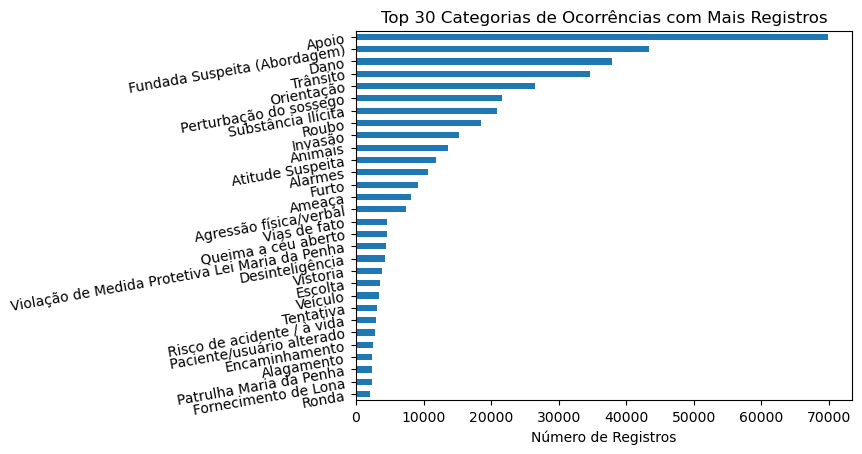

In [149]:
#colocando isto em um gráfico de barras

df_top30_reg= df_filtrado['NATUREZA1_DESCRICAO'].value_counts().sort_values(ascending=False).head(30)
df_top30_reg.sort_values(ascending=True).plot.barh(rot=10)
plt.xlabel('Número de Registros')
plt.title('Top 30 Categorias de Ocorrências com Mais Registros')
plt.show()

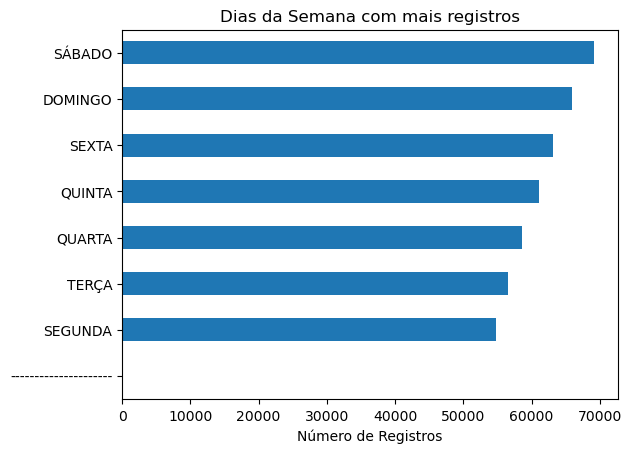

In [160]:
#vamos agora responder a segunda pergunta Quais os dias da semana possuem mais registros?
df['OCORRENCIA_DIA_SEMANA'].value_counts(ascending=True).plot.barh()
plt.xlabel('Número de Registros')
plt.title('Dias da Semana com mais registros')
plt.show()


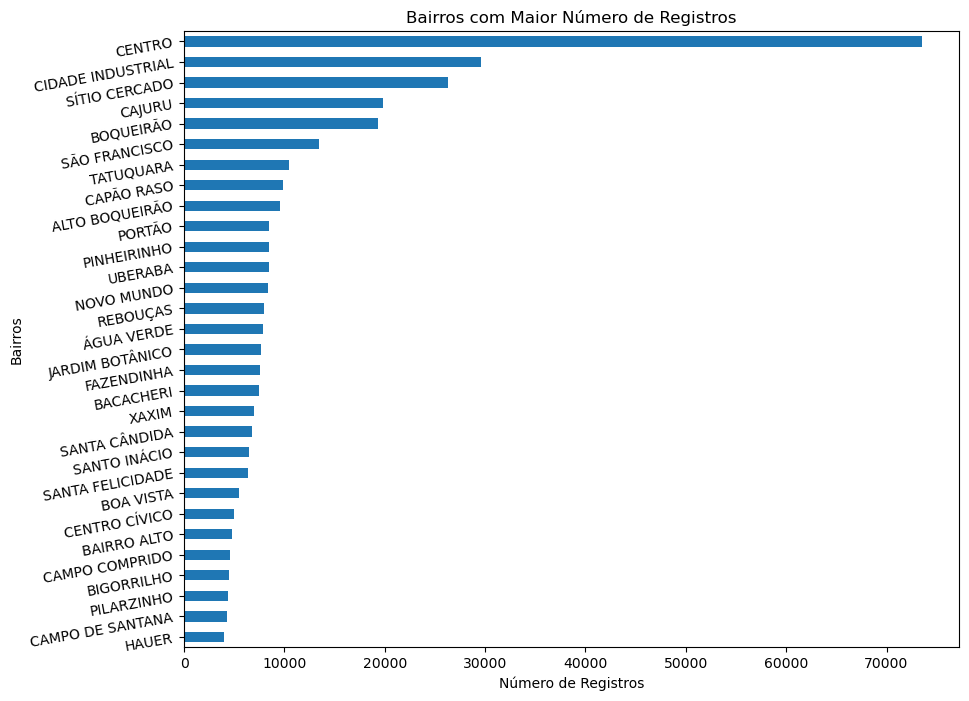

In [151]:
#vamos agora responder a terceira pergunta. Quais bairros possuem mais registros?
df_top30_bairros= df_filtrado['ATENDIMENTO_BAIRRO_NOME'].value_counts().sort_values(ascending=False).head(30)

gr_top30_bairros = df_top30_bairros.sort_values(ascending=True).plot.barh(rot=10, figsize=(10, 8))
gr_top30_bairros.set_xlabel('Número de Registros')
gr_top30_bairros.set_ylabel('Bairros')
gr_top30_bairros.set_title('Bairros com Maior Número de Registros')
plt.show()

In [152]:
df_filtrado.info('OCORRENCIA_ANO')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429347 entries, 0 to 429346
Data columns (total 11 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   ATENDIMENTO_BAIRRO_NOME   429202 non-null  object
 1   LOGRADOURO_NOME           429347 non-null  object
 2   NATUREZA1_DESCRICAO       429347 non-null  object
 3   OCORRENCIA_ANO            429347 non-null  object
 4   OCORRENCIA_CODIGO         429347 non-null  object
 5   OCORRENCIA_DATA           429347 non-null  object
 6   OCORRENCIA_DIA_SEMANA     429347 non-null  object
 7   OCORRENCIA_HORA           429347 non-null  object
 8   OCORRENCIA_MES            429347 non-null  object
 9   OPERACAO_DESCRICAO        317124 non-null  object
 10  ORIGEM_CHAMADO_DESCRICAO  429347 non-null  object
dtypes: object(11)
memory usage: 36.0+ MB


Text(0.5, 1.0, 'Distribuição das ocorrências no período')

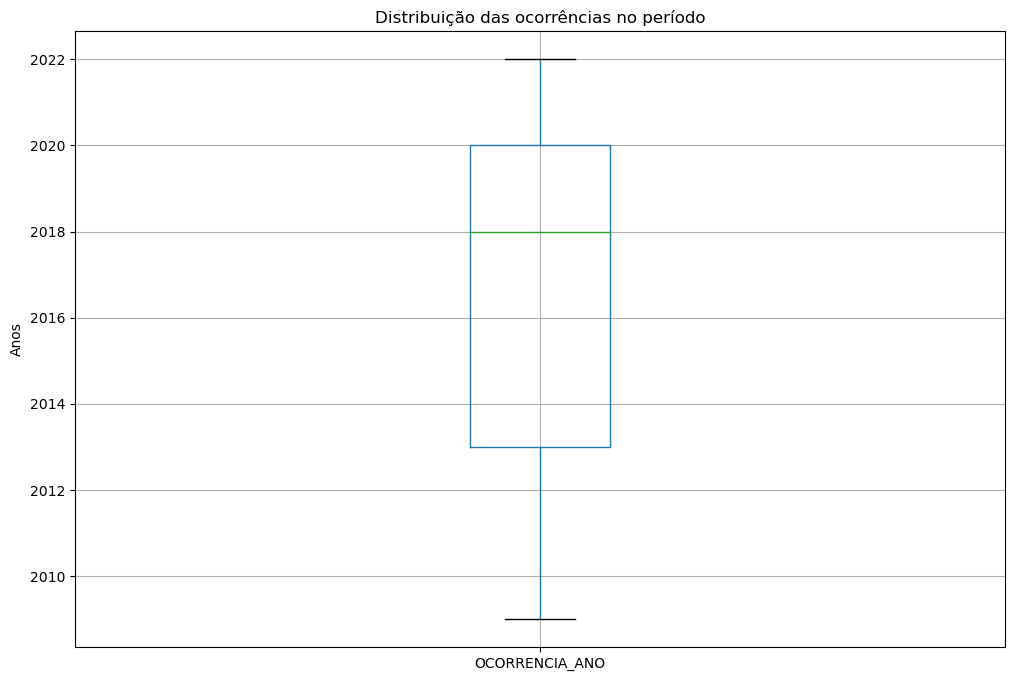

In [165]:
#Limpando a valores inadequados
df_filtrado['OCORRENCIA_ANO'].unique()
df_filtrado = df_filtrado[df_filtrado['OCORRENCIA_ANO'] != '--------------']
#convertendo o tipo de dado para int
df_filtrado['OCORRENCIA_ANO'] = df_filtrado['OCORRENCIA_ANO'].astype(int)
#Colocando num boxplot a distribuiçao dos registros em todo o período.
bx_reg_ano = df_filtrado.boxplot(column=['OCORRENCIA_ANO'], figsize=(12,8))
bx_reg_ano.set_xlabel('')
bx_reg_ano.set_ylabel('Anos')
bx_reg_ano.set_title('Distribuição das ocorrências no período')


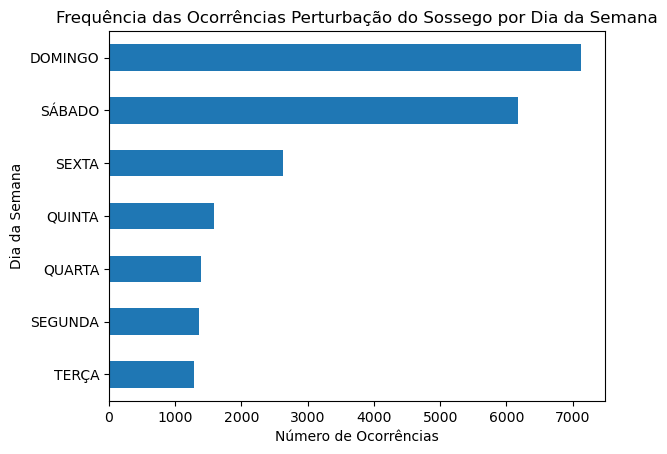

In [155]:
df_perturbacao = df_filtrado[df_filtrado['NATUREZA1_DESCRICAO'] == 'Perturbação do sossego']
df_perturbacao_dia_semana = df_perturbacao.groupby('OCORRENCIA_DIA_SEMANA')['NATUREZA1_DESCRICAO'].count().sort_values(ascending=True)
gr_per_dia_semana = df_perturbacao_dia_semana.plot.barh()
gr_per_dia_semana.set_xlabel('Número de Ocorrências')
gr_per_dia_semana.set_ylabel('Dia da Semana')
gr_per_dia_semana.set_title('Frequência das Ocorrências Perturbação do Sossego por Dia da Semana')
plt.show()

<Axes: ylabel='OCORRENCIA_HORA'>

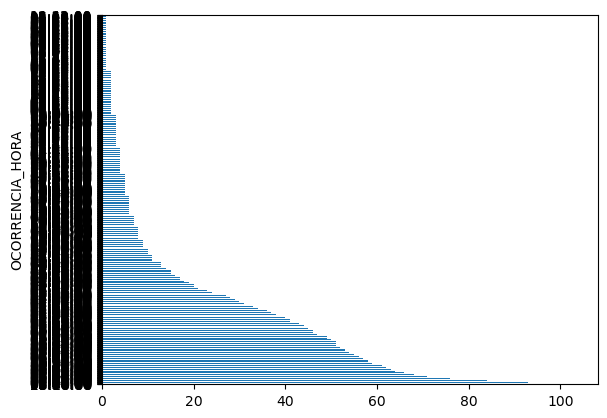

In [156]:
df_perturbacao = df_filtrado[df_filtrado['NATUREZA1_DESCRICAO'] == 'Perturbação do sossego']
df_perturbacao_horario = df_perturbacao.groupby('OCORRENCIA_HORA')['NATUREZA1_DESCRICAO'].count().sort_values(ascending=False)
df_perturbacao_horario.plot.barh()
#nao ficou muito boa a visualização, vamos separar os horarios em 4 periodos, manhã, tarde, noite e madrugada

In [157]:
#para realizar isto, precisamos converter a coluna ocorrencia_hora no formato datetime usando pandas
df_filtrado['OCORRENCIA_HORA'] = pd.to_datetime(df_filtrado['OCORRENCIA_HORA'], format='%H:%M:%S')


# utilizar função para criar nova coluna 'PERIODO_DIA'
def get_period(hour):
    if hour < 6:
        return 'Madrugada'
    elif hour < 12:
        return 'Manhã'
    elif hour < 18:
        return 'Tarde'
    else:
        return 'Noite'
    
df_filtrado['PERIODO_DIA'] = df_filtrado['OCORRENCIA_HORA'].apply(lambda x: get_period(x.hour))#funçao anonima em conjunto com metodo apply recebendo como parametro somente a hora e aplicando o periodo conforme regras da função acima

# verificar a nova coluna 'PERIODO_DIA'
df_filtrado['PERIODO_DIA']


1         Tarde
2         Tarde
3         Tarde
4         Tarde
5         Tarde
          ...  
429342    Manhã
429343    Manhã
429344    Manhã
429345    Manhã
429346    Manhã
Name: PERIODO_DIA, Length: 429346, dtype: object

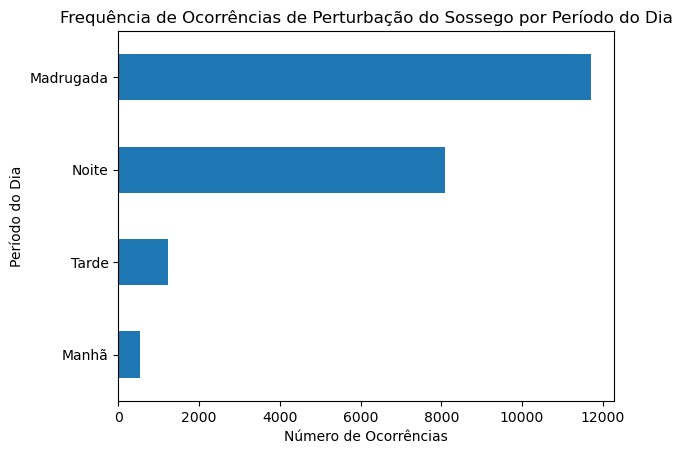

In [158]:
# Agora sim, podemos fazer o grafico
df_perturbacao = df_filtrado[df_filtrado['NATUREZA1_DESCRICAO'] == 'Perturbação do sossego']#jogando novamente o DF com a nova coluna criada periodo_dia
df_perturbacao_horario2 = df_perturbacao.groupby('PERIODO_DIA')['NATUREZA1_DESCRICAO'].count().sort_values(ascending=True)

# Plotar o gráfico de barras horizontais
gr_per_periodo = df_perturbacao_horario2.plot.barh()
gr_per_periodo.set_xlabel('Número de Ocorrências')
gr_per_periodo.set_ylabel('Período do Dia')
gr_per_periodo.set_title('Frequência de Ocorrências de Perturbação do Sossego por Período do Dia')
plt.show()

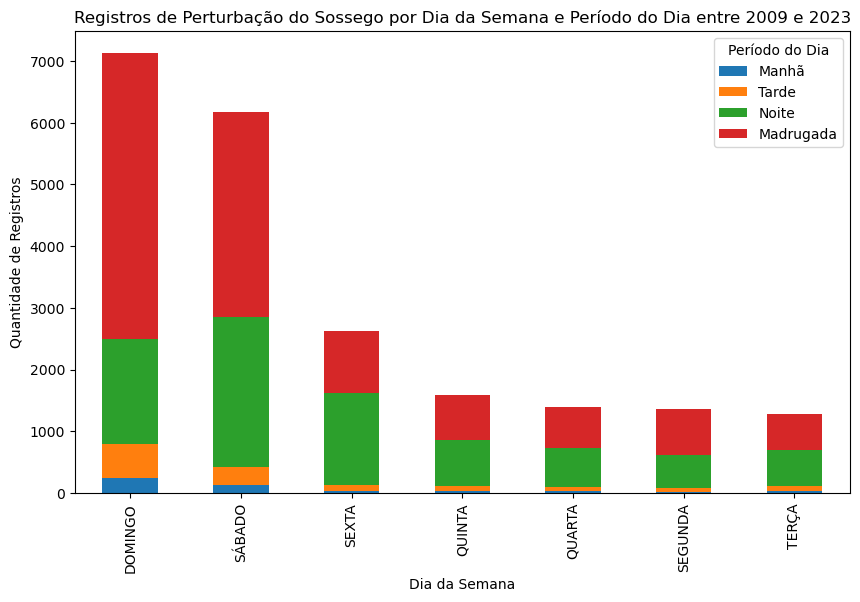

In [159]:
import matplotlib.pyplot as plt
# criando tabela dinâmica com a contagem de registros de perturbação por dia da semana e período do dia
table = pd.crosstab(index=df_perturbacao['OCORRENCIA_DIA_SEMANA'], columns=[df_perturbacao['PERIODO_DIA']], rownames=['Dia da Semana'], colnames=['Período do Dia'])

# Ordenar as colunas pela ordem dos períodos do dia
table = table[['Manhã', 'Tarde', 'Noite','Madrugada']]

# Ordenar as linhas pela quantidade de registros de perturbação do sossego em cada dia da semana, em ordem decrescente
table = table.loc[table.sum(axis=1).sort_values(ascending=False).index]

#Plot com legenda usanndo matplot
ax = table.plot(kind='bar', stacked=True, figsize=(10, 6))
ax.set_xlabel('Dia da Semana')
ax.set_ylabel('Quantidade de Registros')
ax.set_title('Registros de Perturbação do Sossego por Dia da Semana e Período do Dia entre 2009 e 2023')
plt.legend(title='Período do Dia', loc='upper right')
plt.show()